In [2]:
print("retest")

# FOLD = '/content/'
FOLD = '/kaggle/working/'
import os

retest


In [3]:
import shutil

# Function to remove a folder and its contents
def remove_folder(path):
    try:
        shutil.rmtree(path)
        print(f"Folder {path} and its contents successfully removed.")
    except OSError as e:
        print(f"Error: {e.strerror}")
        
# Specify the path of the folder to be removed
folder_path = os.path.join(FOLD, 'dataset')
remove_folder(folder_path)

Error: No such file or directory


In [4]:
!git clone https://github.com/QuanHoangNgoc/Container.git dataset

Cloning into 'dataset'...
remote: Enumerating objects: 6739, done.
remote: Total 6739 (delta 0), reused 0 (delta 0), pack-reused 6739
Receiving objects: 100% (6739/6739), 140.80 MiB | 37.84 MiB/s, done.
Updating files: 100% (7024/7024), done.


# "Source Code"

## --Const

In [5]:
######################################################################################
# Const
######################################################################################
CLEAR_LOG = True  # clear file log (if need)
example_code = True

TYPE = 'COLOR'
SIZE = (240, 240)
VALUE = [0, 255]


In [6]:
######################################################################################
# Set Up
######################################################################################
import skimage as ski
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import math


if (example_code):
    print("ski version: ", ski.__version__)
    print("numpy version: ", np.__version__)
    print("pandas version: ", pd.__version__)
    print("sklearn version: ", skl.__version__)


ski version:  0.22.0
numpy version:  1.26.4
pandas version:  2.2.2
sklearn version:  1.2.2


In [7]:
######################################################################################
# Utils
######################################################################################
import logging
from absl import logging as absl_logging
from skimage import io, exposure
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import inspect


######################################################################################################
# NORMAL UTIL
######################################################################################################
def get_current_method_name(index=2):
    current_frame = inspect.stack()[index]
    method_name = current_frame.function
    return "<" + method_name + ">"


NUM_PRT_SC = int(1e18)


def setup_logging():
    # Set the log file path
    _log_file = os.path.join(os.getcwd(), '_log')
    if not os.path.exists(_log_file):
        os.makedirs(_log_file)
    _log_file = os.path.join(_log_file, 'log.txt')
    if (CLEAR_LOG and os.path.exists(_log_file)):
        os.remove(_log_file)

    # format = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
    # Configure the Python logging to write to the log file
    logging.basicConfig(filename=_log_file, level=logging.INFO, format=None)
    # Redirect absl logging to the Python logging
    absl_logging.use_python_logging()
    absl_logging.info("\n\n")


setup_logging()


class ut:
    _active = True

    def __init__(self):
        pass

    def act(active):
        ut._active = active
        global NUM_PRT_SC
        if NUM_PRT_SC > 2:
            NUM_PRT_SC = 2
        else:
            NUM_PRT_SC = int(1e18)

    def prt_section():
        global NUM_PRT_SC
        if NUM_PRT_SC < 1:
            return
        else:
            NUM_PRT_SC -= 1
        logging.info("~" * int(77 * 1))
        print("~" * int(77 * 1), flush=True)

    def mess(*mess):
        if ut._active == False:
            return
        ut.prt_section()
        out = '# '
        func_dir = get_current_method_name()
        if (func_dir not in ['<over>', '<note_verbose>']):
            out += get_current_method_name() + "\n"

        for arg in mess:
            out += str(arg) + " "
        global absl_logging
        absl_logging.info(out)
        print(out, flush=True)
        ut.prt_section()

    def note_verbose(flag, title):
        if ut._active == False:
            return
        func_dir = get_current_method_name()
        # ut.prt_section()
        ut.mess("__verbose__:", func_dir, "\n", "@@@", title)
        # ut.prt_section()

    def over(val, var_name=None):
        if ut._active == False:
            return
        if var_name == None:
            var_name = "{}".format(get_current_method_name())
        else:
            var_name = "{1} \n [{0}]".format(var_name,
                                             get_current_method_name())
        # ut.prt_section()
        try:
            ratio = val.std()**2/(val.max()-val.min()) * 100
            ratio = round(ratio, 2)
            ut.mess(
                "__var__:",
                var_name + "\n",
                [(val.dtype, type(val)), val.shape], "\n",
                [(val.min(), val.max()), (val.mean(),
                                          val.std() ** 2, str(ratio) + " %")], "\n",
                [np.sum(np.isnan(val)), str(
                    round(sys.getsizeof(val)/10**6, 2)) + " Mb"],
            )
        except:
            try:
                ut.mess(
                    "__var__:",
                    var_name + "\n",
                    (type(val), len(val), "no-min-max-mean"),
                )
            except:
                ut.mess(
                    "__var__:",
                    var_name + "\n",
                    (type(val), "no-shape", "no-min-max-mean"),
                )
        # ut.prt_section()

    def error(tilte):
        func_dir = get_current_method_name()
        # ut.prt_section()
        ut.mess("__error__:", func_dir, "@@@", tilte)
        # ut.prt_section()
        assert 1 == 0


In [8]:
######################################################################################################
# SKI UTIL
######################################################################################################
def retype_image(image: np.ndarray, istype: str):
    if (istype not in ['float', 'ubyte', 'int']):
        ut.error()
    if (istype == 'float'):
        return ski.util.img_as_float(image)
    if (istype == 'ubyte'):
        return ski.util.img_as_ubyte(image)
    if (istype == 'int'):
        return ski.util.img_as_int(image)
    ut.error()


def revalue_image(image, in_range, out_range):
    return ski.exposure.rescale_intensity(image, in_range=in_range, out_range=out_range)


def show_image(image: np.ndarray, choose=1):
    try:
        assert (choose == 0)
        out = ski.util.img_as_uint(image) # Convert to int
        plt.imshow(out)
        plt.axis('off')  # Optional: to hide the axis
        plt.show()
    except:
        # Display the image using skimage's viewer
        out = ski.util.img_as_uint(image) # Convert to int
        print('cmap = gray')
        plt.imshow(out, cmap='gray')
        plt.axis('off')  # Optional: to hide the axis
        plt.show()


def read_image(path: str, as_gray=True):
    image = ski.io.imread(path, as_gray=as_gray)
    image = ski.img_as_float(image)
    return image

def recolor_image(image, channel):
    if (channel not in ['gray', 'rgb']):
        ut.error()
    if (channel == 'gray'):
        return ski.color.rgb2gray(image)
    if (channel == 'rgb'):
        return ski.color.gray2rgb(image)
    ut.error()


def show_his(image):
    try:
        colors = ('red', 'green', 'blue')
        for color, channel in zip(colors, image.transpose((2, 0, 1))):
            hist, hist_centers = exposure.histogram(channel)
#             hist /= len(hist.flatten())
            plt.fill_between(hist_centers, hist, label=color, alpha=0.3)
        plt.legend()
        plt.title('Histogram for Each Color Channel')
    except:
        # Compute the histogram
        hist, hist_centers = exposure.histogram(image)
#         hist /= len(hist.flatten())
        # Display the histogram
        plt.fill_between(hist_centers, hist, alpha=0.3)
        plt.title('Histogram of Grayscale Image')
    plt.xlabel('Pixel intensity')
    plt.ylabel('Frequency')
    plt.show()


In [9]:
######################################################################################################
# Random files
######################################################################################################
import random
def get_random_file_in_folder(root_folder, K):
    lis = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            file_path = os.path.join(root, file)
            lis.append(file_path)
    random.shuffle(lis)
    return lis[:K]


# Data

In [10]:
from skimage import color, io
SIZE = (240, 240, 3)
VALUE = 'ubyte'


def get_X_from_folder(folder_path):
    files = os.listdir(folder_path)
    files = sorted(files) # Fixed
    X = []
    for filename in files:
        path = os.path.join(folder_path, filename)
        org_image = io.imread(path) # Color 
        # Resize image -> Retype image 
        org_image = ski.transform.resize(org_image, SIZE, anti_aliasing=True)
        org_image = retype_image(org_image, 'ubyte')
        X.append(org_image)
    X = np.array(X)
    return X


In [11]:
from sklearn.model_selection import train_test_split


def create_data(num_few=32, seed=42, name='Testing'):
    X = get_X_from_folder(FOLD + '/dataset/' + name + '/notumor')
    X_train, X_test = train_test_split(X, test_size=num_few, random_state=seed)
    X1 = X_test

    X = get_X_from_folder(FOLD + '/dataset/' + name + '/glioma')
    X_train, X_test = train_test_split(X, test_size=num_few, random_state=seed)
    X2 = X_test

    # Merge
    X = np.concatenate((X1, X2), axis=0)
    Y = [0] * num_few + [1] * num_few
    Y = np.array(Y)
    # Y = Y.reshape(-1, 1)
    return X, Y


In [12]:
if(example_code):
    X, Y = create_data()
    ut.over(X, "X")
    ut.over(Y, "Y")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [X]
 [(dtype('uint8'), <class 'numpy.ndarray'>), (64, 240, 240, 3)] 
 [(0, 255), (48.34201108579283, 3082.749898624808, '1208.92 %')] 
 [0, '11.06 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [Y]
 [(dtype('int64'), <class 'numpy.ndarray'>), (64,)] 
 [(0, 1), (0.5, 0.25, '25.0 %')] 
 [0, '0.0 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


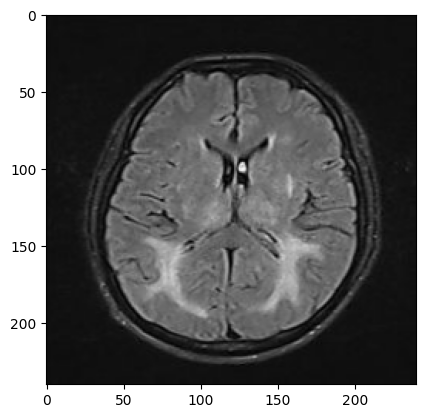

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# <<module>>
26 0 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [13]:
if(example_code): 
    i = random.randint(0, len(X))
    plt.imshow(X[i])
    plt.show()
    ut.mess(i, Y[i])
    

# MDP State to State 

In [14]:
from skimage import color, io
import numpy as np


def get_overlay_color(state):
    if state == "active":
        return (0, 255, 0)  # Green for active
    else:
        return (255, 0, 0)  # Red for inactive (or other state)

    
def overlay_image(image, state, alpha=0.1):
    grayscale_image = color.rgb2gray(image)
    overlay_color = get_overlay_color(state)
    overlay = np.full(image.shape, overlay_color, dtype=np.uint8)
    # Apply transparency
    overlay = (1 - alpha) * image + alpha * overlay
    # Combine grayscale and overlay
    final_image = grayscale_image[..., np.newaxis] * np.ones_like(overlay) + overlay
    return final_image.astype(np.uint8)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [14]
 [(dtype('uint8'), <class 'numpy.ndarray'>), (240, 240, 3)] 
 [(3, 255), (89.69199652777777, 5837.400880388876, '2316.43 %')] 
 [0, '0.0 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [overlay_image]
 [(dtype('uint8'), <class 'numpy.ndarray'>), (240, 240, 3)] 
 [(0, 255), (88.82255208333333, 4896.119212468352, '1920.05 %')] 
 [0, '0.17 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


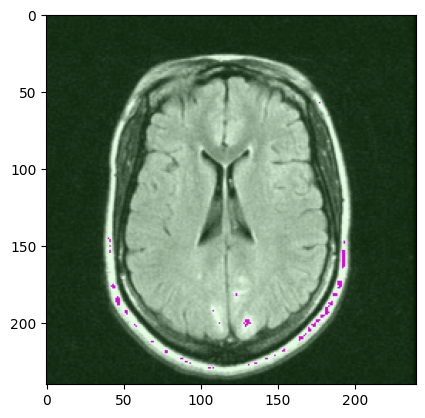

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [58]
 [(dtype('uint8'), <class 'numpy.ndarray'>), (240, 240, 3)] 
 [(0, 249), (54.389409722222226, 2337.079610068239, '938.59 %')] 
 [0, '0.0 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [overlay_image]
 [(dtype('uint8'), <class 'numpy.ndarray'>), (240, 240, 3)] 
 [(0, 250), (57.17526041666667, 2054.1994516104232, '821.68 %')] 
 [0, '0.17 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


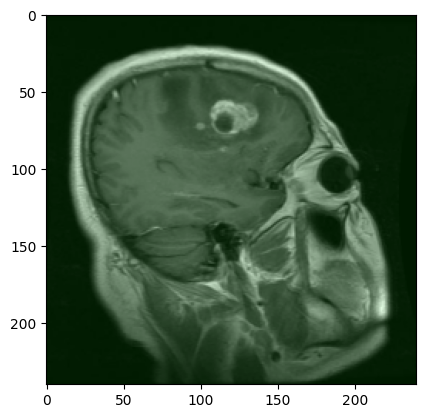

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [27]
 [(dtype('uint8'), <class 'numpy.ndarray'>), (240, 240, 3)] 
 [(0, 240), (54.13357638888889, 1763.246775403887, '734.69 %')] 
 [0, '0.0 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [overlay_image]
 [(dtype('uint8'), <class 'numpy.ndarray'>), (240, 240, 3)] 
 [(0, 242), (56.93233796296296, 1585.9782227746696, '655.36 %')] 
 [0, '0.17 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


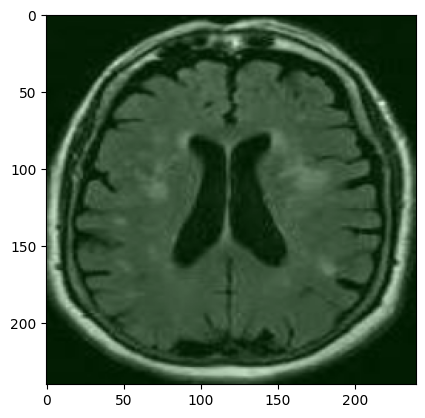

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [20]
 [(dtype('uint8'), <class 'numpy.ndarray'>), (240, 240, 3)] 
 [(0, 255), (63.238055555555555, 6872.11975316358, '2694.95 %')] 
 [0, '0.0 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [overlay_image]
 [(dtype('uint8'), <class 'numpy.ndarray'>), (240, 240, 3)] 
 [(0, 255), (63.08156828703704, 5452.996639438624, '2138.43 %')] 
 [0, '0.17 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


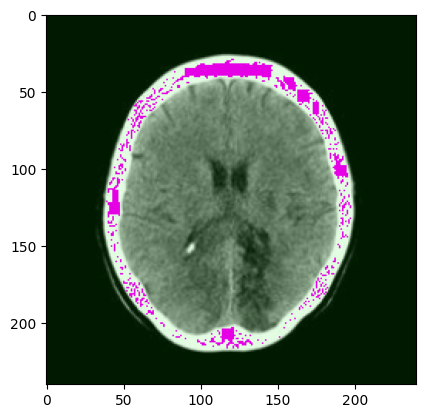

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [43]
 [(dtype('uint8'), <class 'numpy.ndarray'>), (240, 240, 3)] 
 [(0, 221), (31.67361111111111, 1272.8629147376544, '575.96 %')] 
 [0, '0.0 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [overlay_image]
 [(dtype('uint8'), <class 'numpy.ndarray'>), (240, 240, 3)] 
 [(0, 225), (36.71331597222222, 1179.6753874996987, '524.3 %')] 
 [0, '0.17 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


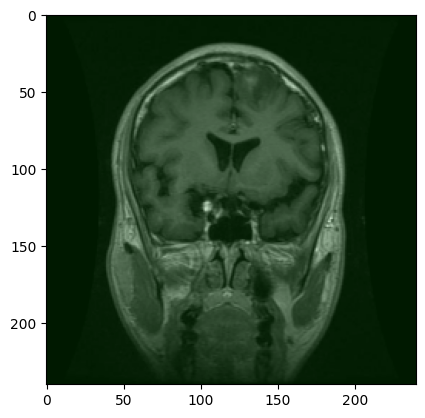

In [15]:
if(example_code):
    lis = [x for x in range(64)]
    random.shuffle(lis)
    lis = lis[:5]
    
    for i in lis:
        image = X[i]
        ut.over(image, str(i))

        # Overlay with desired state and adjust alpha if needed
        final_image = overlay_image(image, "active", alpha=0.1)  
        ut.over(final_image, "overlay_image")

        # Display or save the final image (replace with your desired function)
        plt.imshow(final_image)
        plt.show()


## DQN 

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers


def create_dqn_model(input_shape=(240, 240, 3), num_actions=2, lr=1e-4, loss='mse'):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), strides=2, padding='same', activation='elu', input_shape=input_shape, kernel_initializer=initializers.glorot_uniform()))
    model.add(layers.Conv2D(32, (3, 3), strides=2, padding='same', activation='elu', kernel_initializer=initializers.glorot_uniform()))
    model.add(layers.Conv2D(32, (3, 3), strides=2, padding='same', activation='elu', kernel_initializer=initializers.glorot_uniform()))
    model.add(layers.Conv2D(32, (3, 3), strides=2, padding='same', activation='elu', kernel_initializer=initializers.glorot_uniform()))

    # Flatten the output volume
    model.add(layers.Flatten())

    # Dense layers
    model.add(layers.Dense(512, activation='elu', kernel_initializer=initializers.glorot_uniform()))
    model.add(layers.Dense(256, activation='elu', kernel_initializer=initializers.glorot_uniform()))
    model.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.glorot_uniform()))

    # Output layer
    model.add(layers.Dense(num_actions))  # Assuming num_actions = 2 for 2 actions

    # Compile the model
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=adam_optimizer, loss=loss)  # You can change the optimizer and loss function as needed
    model.summary()
    return model


2024-06-03 10:55:20.970245: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 10:55:20.970354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 10:55:21.106272: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
dqn = create_dqn_model()
dqn(np.array([X[0]]))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 120, 120, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,686,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,880,034 (14.80 MB)

 Trainable params: 3,880,034 (14.80 MB)

 Non-trainable params: 0 (0.00 B)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[2.3155234 , 0.18723273]], dtype=float32)>

In [18]:
Y[0]

0

# Curriculum Learning

In [19]:
def eval_testset(policy_net, test_states, x_test, y_test): 
    actions = policy_net.predict(test_states).argmax(axis=1)
    ut.mess("acc: ", sum(actions == y_test), len(y_test))
    return sum(actions == y_test)
    

def get_test_states(x_test): 
    test_states = [] 
    for image in x_test: 
        state = "inactive"
        state_over_image = overlay_image(image, state, alpha=0.1)
        test_states.append(state_over_image)
    test_states = np.array(test_states)
    return test_states


In [20]:
from collections import deque


def td_dqn(model, x_arr, y_arr, random_list, x_test, y_test,
           num_episodes=300, batch_size=32, target_update=10, gamma=0.99):
    
    random_list = [x for x in range(len(x_arr))] * 100
    train_states = get_test_states(x_arr)
    test_states = get_test_states(x_test)
    his_train, his_test = [], [] 
    
    
    input_shape = (240, 240, 3)
    action_size = 2
    if(model == None): 
        policy_net = create_dqn_model(input_shape, action_size)
    else: 
        policy_net = model
    target_net = create_dqn_model(input_shape, action_size)
    target_net.set_weights(policy_net.get_weights())

    
    replay_memory = deque(maxlen=1500)
    epsilon = 0.7
    decay = 1e-4
    min_epsilon = 1e-4


    for episode in range(num_episodes):
        idx = random_list[episode]
        image, label = x_arr[idx], y_arr[idx]
        state = "inactive"
        for done in range(5): 
            state_over_image = overlay_image(image, state, alpha=0.1)
            if np.random.rand() < epsilon:
                action = np.random.randint(action_size)
            else:
                q_values = policy_net.predict(state_over_image.reshape((1,) + x_arr[0].shape), verbose=0)
                action = np.argmax(q_values[0])


            if(label == action):
                next_state = "active"
                reward = 1
            else:
                next_state = "inactive"
                reward = -1


            next_state_over_image = overlay_image(image, next_state, alpha=0.1)
            replay_memory.append((state_over_image, action, reward, next_state_over_image, done==4))
            state = next_state

            
            if len(replay_memory) >= batch_size:
                minibatch = random.sample(replay_memory, batch_size)
                states, actions, rewards, next_states, dones = zip(*minibatch)

                states = np.array(states)
                actions = np.array(actions)
                rewards = np.array(rewards)
                next_states = np.array(next_states)
                dones = np.array(dones)

                current_q_values = policy_net.predict(states, verbose=0)
                next_q_values = target_net.predict(next_states, verbose=0).max(axis=1)
                target_q_values = rewards + gamma * next_q_values #!!! Delete done 
                current_q_values[np.arange(batch_size), actions] = target_q_values

                policy_net.fit(states, current_q_values, verbose=0)


        if episode % target_update == 0: # Target update
            target_net.set_weights(policy_net.get_weights())
            
        
        his_train.append(eval_testset(policy_net, train_states, x_arr, y_arr))
        his_test.append(eval_testset(policy_net, test_states, x_test, y_test))
        if(his_test[-1] > max_acc): 
            max_acc = his_test[-1] 
            policy_net.save("best_200_500.h5") 
            
        epsilon = max(min_epsilon, epsilon - decay)  # Epsilon decay

    return policy_net, his_train, his_test



# Train=200, Test=500

In [21]:
import numpy as np

x_test, y_test = create_data(num_few=250) 
x_arr, y_arr = create_data(100, name='Training')

list_size = 10**5
np.random.seed(42)
random_list = np.random.randint(0, len(x_arr), size=list_size)
print(random_list)

[102 179  92 ...  97  56 169]


In [22]:
ut.over(x_arr)
ut.over(y_arr)

ut.over(x_test)
ut.over(y_test)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>>
 [(dtype('uint8'), <class 'numpy.ndarray'>), (200, 240, 240, 3)] 
 [(0, 255), (45.92595164930555, 3156.865503907737, '1237.99 %')] 
 [0, '34.56 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>>
 [(dtype('int64'), <class 'numpy.ndarray'>), (200,)] 
 [(0, 1), (0.5, 0.25, '25.0 %')] 
 [0, '0.0 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>>
 [(dtype('uint8'), <class 'numpy.ndarray'>), (500, 240, 240, 3)] 
 [(0, 255), (47.423643831018516, 3044.2932383697157, '1193.84 %')] 
 [0, '86.4 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [23]:
trained_dqn = None 
trained_dqn, his_train, his_test = td_dqn(trained_dqn, x_arr, y_arr, random_list, x_test, y_test,
    num_episodes=1000, batch_size=32, target_update=10, gamma=0.99)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 120, 120, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,686,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,880,034 (14.80 MB)

 Trainable params: 3,880,034 (14.80 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 120, 120, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     3,686,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,880,034 (14.80 MB)

 Trainable params: 3,880,034 (14.80 MB)

 Non-trainable params: 0 (0.00 B)

I0000 00:00:1717412218.123370     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step

W0000 00:00:1717412219.694981     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


W0000 00:00:1717412220.559082     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# <eval_testset>
acc:  79 200 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


W0000 00:00:1717412222.036887     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# <eval_testset>
acc:  219 500 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


W0000 00:00:1717412223.279779     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717412228.691837     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# <eval_testset>
acc:  94 200 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# <eval_testset>
acc:  245 500 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# <eval_testset>
acc:  99 200 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# <eval_testset>
acc:  249 500 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [24]:
trained_dqn.save("model_200_500.h5")
trained_dqn = tf.keras.load_model("best_200_500.h5")

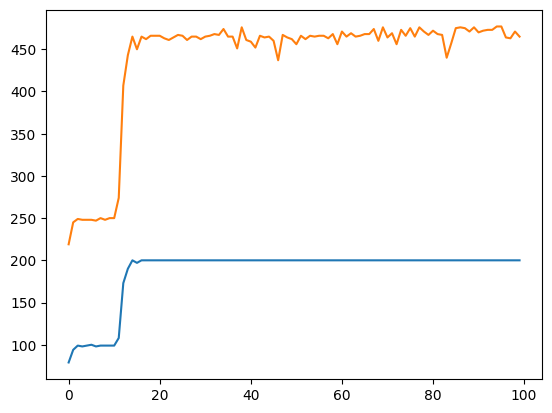

In [25]:
plt.plot(his_train)
plt.plot(his_test)

df_save = pd.DataFrame({'200_500_train': his_train, '200_500_test': his_test})
df_save.to_csv('dqn_200_500.csv')


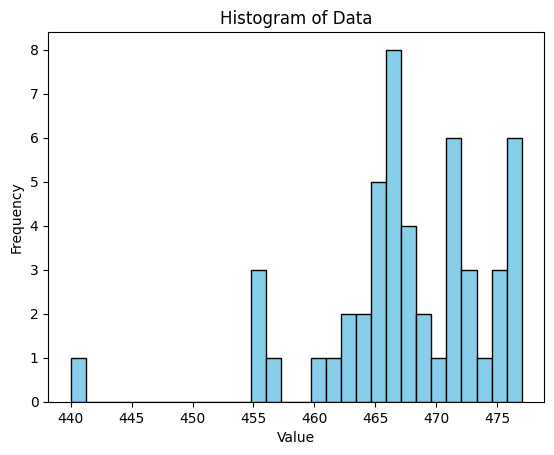

467.6

In [26]:
data = his_test.copy()
data = data[50:100]

plt.hist(data, bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()
np.mean(data)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1
 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1]
Classification Report: train result
              precision    recall  f1-score   support

           0     0.7194    1.0000    0.8368       100
           1     1.0000    0.6100    0.7578       100

    accuracy                         0.8050       200
   macro avg     0.8597    0.8050    0.7973       200
weighted avg     0.8597    0.8050    0.7973       200

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

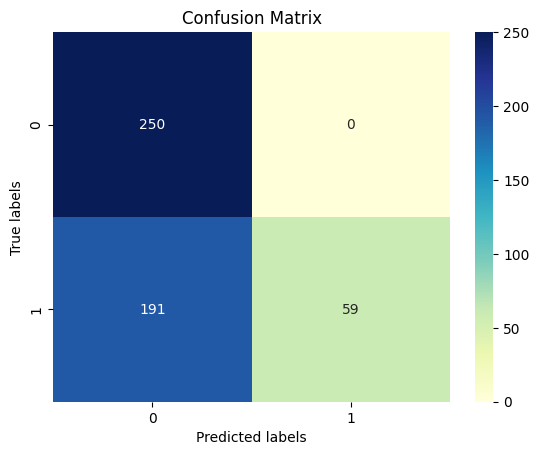

In [27]:
from sklearn.metrics import classification_report, confusion_matrix


def show_evluation(trained_model, x_test, y_test, name):
    y_pred = trained_model.predict(get_test_states(x_test)).argmax(axis=1)
    print(y_pred)
    report = classification_report(y_test, y_pred, digits=4)

    # Print the classification report
    print('Classification Report: {}'.format(name))
    print(report)


def show_heatmap(clf, x_test, y_test):
    y_pred = clf.predict(x_test).argmax(axis=1)
#     print(y_pred)
    cm = confusion_matrix(y_test, y_pred)
    # Create a heatmap using seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
    # Add labels and title
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    

show_evluation(trained_dqn, x_arr, y_arr, "train result")
show_evluation(trained_dqn, x_test, y_test, "test result")
show_heatmap(trained_dqn, x_test, y_test)


In [28]:
x_new = [] 
for x in x_arr: 
    x_new.append(x.flatten())
x_new = np.array(x_new)

x_new_test = [] 
for x in x_test: 
    x_new_test.append(x.flatten())
x_new_test = np.array(x_new_test)


In [29]:
ut.over(x_new)
ut.over(x_new_test)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>>
 [(dtype('uint8'), <class 'numpy.ndarray'>), (200, 172800)] 
 [(0, 255), (45.92595164930555, 3156.865503907737, '1237.99 %')] 
 [0, '34.56 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>>
 [(dtype('uint8'), <class 'numpy.ndarray'>), (500, 172800)] 
 [(0, 255), (47.423643831018516, 3044.2932383697157, '1193.84 %')] 
 [0, '86.4 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create and train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_new, y_arr)
y_pred_svm = svm_classifier.predict(x_new_test)
report = classification_report(y_test, y_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       250
           1       0.87      0.91      0.89       250

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



In [32]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create and train an SVM classifier
svm_classifier = SVC()
svm_classifier.fit(x_new, y_arr)
y_pred_svm = svm_classifier.predict(x_new_test)
report = classification_report(y_test, y_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       250
           1       0.86      0.96      0.91       250

    accuracy                           0.90       500
   macro avg       0.91      0.90      0.90       500
weighted avg       0.91      0.90      0.90       500



In [31]:
# Create and train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_new, y_arr)
y_pred_knn = knn_classifier.predict(x_new_test)
report = classification_report(y_test, y_pred_knn)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.74      0.85       250
           1       0.80      1.00      0.89       250

    accuracy                           0.87       500
   macro avg       0.90      0.87      0.87       500
weighted avg       0.90      0.87      0.87       500



In [33]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD

# Load the pre-trained VGG16 model without the top layer (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False)

# Add a new dense layer to be trained for the specific classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Replace "num_classes" with the number of categories in your dataset

# Define the new model with the modified architecture
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model (VGG16) to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = True 

# Compile the model with a custom optimizer and appropriate loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])


# Train the model on your dataset
model.fit(
    x_arr, y_arr, 
    epochs=30,
    validation_data=(x_test, y_test))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 153s 10s/step - binary_accuracy: 0.5854 - loss: 165.0123 - val_binary_accuracy: 0.5000 - val_loss: 15.3547
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 761ms/step - binary_accuracy: 0.5352 - loss: 11.2307 - val_binary_accuracy: 0.5000 - val_loss: 1.0393
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 753ms/step - binary_accuracy: 0.5054 - loss: 0.7815 - val_binary_accuracy: 0.5000 - val_loss: 0.6660
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 749ms/step - binary_accuracy: 0.4717 - loss: 0.6610 - val_binary_accuracy: 0.5000 - val_loss: 0.7839
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 749ms/step - binary_accuracy: 0.5495 - loss: 0.6926 - val_binary_accuracy: 0.5060 - val_loss: 0.6562
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 749ms/step - binary_accuracy: 0.5763 - loss: 0.5862 - val_binary_accuracy: 0.5000 - val_loss: 0.7599
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 747ms/step - binary_accuracy: 0.6186 - loss: 0.6393 - val_binary_a

In [34]:
y_pred = [] 
lis = model.predict(x_test) 
for x in lis: 
    if(x >= 0.5): y_pred.append(1)
    else: y_pred.append(0)

report = classification_report(y_test, y_pred, digits=4)
print(report)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step
              precision    recall  f1-score   support

           0     0.9706    0.9240    0.9467       250
           1     0.9275    0.9720    0.9492       250

    accuracy                         0.9480       500
   macro avg     0.9490    0.9480    0.9480       500
weighted avg     0.9490    0.9480    0.9480       500



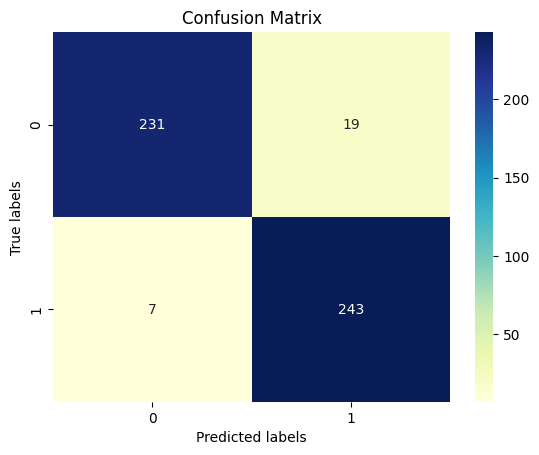

In [35]:
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
    